In [2]:
sys.path.append('..')
from utils import IoU                  # metric class
from utils import evaluate_model

import sys

In [ ]:
# basic imports
import random
import numpy as np
import os
import sys

# DL library imports
import torch
import segmentation_models_pytorch as smp

# libraries for loading image, plotting 
import matplotlib.pyplot as plt
import pandas as pd

# Compare two models
This notebook compares two models on a dataset.
Settings for the comparison can be set in the following cell with different given options commented out. 

- model1_name + model2_name: path to models
- data_path: path to data (patches placed in folder rgb_test and label_test)
- dataset: 'potsdam' or 'floodnet' (used for visualization)
- norm_dataset: dataset for image normalization
- patch_size: the size the patches should be resized to
- label_add: text describing model type to add to plots

For furhter details of the settings see the documentation of the repository.

In [3]:
#----------------------------------------------------------
#---------------- JupyterHub ------------------------------
# #----------------------------------------------------------
models_dir = '/home/j/j_sten07/thesis_test/output/'

# #----------------------------------------------------------
patch_size = 512
label_add = 'S'
dataset = 'potsdam'
# data_path= '/home/j/j_sten07/thesis_test/data/Potsdam/patches/512px/test_14_15'  # use same test data as for other models
data_path= '/palma/scratch/tmp/j_sten07/data/Potsdam/patches/512px/test_14_15'
# model1_name = 'unet_train-10_ps512px_400ep_lr5e-5_jaccard'
# model2_name = 'segformer_train-10_ps512px_400ep_lr5e-5_jaccard'
# norm_dataset = 'own'
model1_name = 'unet_train-10_ps512px_400ep_lr5e-5_jaccard_ownNorm'
model2_name = 'segformer_train-10_ps512px_400ep_lr5e-5_jaccard_ownNorm'
norm_dataset = 'potsdam'



#----------------------------------------------------------
#---------------- PALMA -----------------------------------
#----------------------------------------------------------
# models_dir = '/palma/scratch/tmp/j_sten07/output/'

# # # #----------------------------------------------------------
# patch_size = 1024
# label_add = '1024'
# dataset = 'potsdam'
# data_path= '/palma/scratch/tmp/j_sten07/data/Potsdam/patches/1024px/test_14_15'
# # model1_name = 'unet_100ep_ps1024_test-14-15_randomsplit_lr5e-4_jaccard_b2w2'
# # model2_name = 'segformer_100ep_ps1024_test-14-15_randomsplit_lr5e-5_jaccard_b2w2'
# # norm_dataset = 'own'
# model1_name = 'unet_400ep_ps1024_test-14-15_randomsplit_lr5e-5_jaccard_b2w2_ownNorm'
# model2_name = 'segformer_400ep_ps1024_test-14-15_randomsplit_lr5e-5_jaccard_b2w2_ownNorm'
# norm_dataset = 'potsdam'

# #----------------------------------------------------------
# patch_size = 512
# label_add = '512'
# dataset = 'potsdam'
# data_path= '/palma/scratch/tmp/j_sten07/data/Potsdam/patches/512px/test_14_15' # data_path= '/home/j/j_sten07/thesis_test/data/Potsdam/patches/512px/test_14_15'  # if PALMA doesnt work
# # model1_name = 'unet_200ep_512px_test-14-15_randomsplit_lr5e-4_jaccard'
# # model2_name = 'segformer_200ep_512px_test-14-15_randomsplit_lr6e-5_jaccard'
# # norm_dataset = 'own'
# model1_name = 'unet_300ep_512px_test-14-15_randomsplit_lr5e-5_jaccard_ownNorm'
# model2_name = 'segformer_300ep_ps512_test-14-15_randomsplit_lr5e-5_jaccard_ownNorm'
# norm_dataset = 'potsdam'


# #----------------------------------------------------------
# patch_size = 256
# label_add = '256'
# dataset = 'potsdam'
# data_path= '/palma/scratch/tmp/j_sten07/data/Potsdam/patches/256px/test_14_15' # data_path= '/home/j/j_sten07/thesis_test/data/Potsdam/patches/512px/test_14_15'  # if PALMA doesnt work
# # model1_name = 'unet_200ep_ps256_test-14-15_randomsplit_lr5e-4_jaccard'
# # model2_name = 'segformer_200ep_ps256_test-14-15_randomsplit_lr6e-5_jaccard'
# # norm_dataset = 'own'
# model1_name = 'unet_200ep_ps256_test-14-15_randomsplit_lr5e-5_jaccard_ownNorm'
# model2_name = 'segformer_200ep_ps256_test-14-15_randomsplit_lr5e-5_jaccard_ownNorm'
# norm_dataset = 'potsdam'

# #----------------------------------------------------------
# patch_size = 128
# label_add = '128'
# dataset = 'potsdam'
# data_path= '/palma/scratch/tmp/j_sten07/data/Potsdam/patches/128px/test_14_15'
# # maybe these will still be changed
# model1_name = 'unet_300ep_ps128_test-14-15_randomsplit_lr3e-5_jaccard_ownNorm' 
# model2_name = 'segformer_300ep_ps128_test-14-15_randomsplit_lr3e-5_jaccard_ownNorm' 
# norm_dataset = 'potsdam'


#----------------------------------------------------------
#------------------- IRRG ---------------------------------
# patch_size = 512
# label_add = 'IR Transfer'
# dataset = 'potsdam'
# data_path = '/palma/scratch/tmp/j_sten07/data/Vaihingen/patches/256px'
# norm_dataset = 'vaihingen'
# # data_path= '/palma/scratch/tmp/j_sten07/data/Potsdam/patches/512px/ir_test_14_15'
# # norm_dataset = 'potsdam_irrg'
# # model1_name = 'unet_200ep_ps512px-irrg_ir-test-14-15_randomsplit_lr5e-4_jaccard'
# # model2_name = 'segformer_200ep_ps512-irrg_ir-test-14-15_randomsplit_lr6e-5_jaccard'
# # norm_dataset = 'own'
# model1_name = 'unet_300ep_ps512px-irrg_ir-test-14-15_randomsplit_lr5e-5_jaccard_ownnorm'
# model2_name = 'segformer_300ep_ps512px-irrg_ir-test-14-15_randomsplit_lr5e-5_jaccard_ownnorm'




#----------------------------------------------------------
#------------- Floodnet -----------------------------------
# patch_size = 512
# dataset = 'floodnet'
# label_add = 'floodnet-512'
# data_path= '/palma/scratch/tmp/j_sten07/data/FloodNet/512px' # data_path= '/home/j/j_sten07/thesis_test/data/Potsdam/patches/512px/test_14_15'  # if PALMA doesnt work
# model1_name = 'unet_200ep_floodnet-ps512_randomsplit_lr3e-5_weightedCE_b2'
# model2_name = 'segformer_200ep_floodnet-ps512_randomsplit_lr3e-5_weightedCE_b2'
# norm_dataset = 'floodnet'


# #----------------------------------------------------------
# patch_size = 1024
# dataset = 'floodnet'
# label_add = 'floodnet-1024'
# data_path= '/palma/scratch/tmp/j_sten07/data/FloodNet/1024px' # data_path= '/home/j/j_sten07/thesis_test/data/Potsdam/patches/512px/test_14_15'  # if PALMA doesnt work
# model1_name = 'unet_100ep_floodnet-ps1024_randomsplit_lr5e-5_weightedCE_b2_ownNorm'
# model2_name = 'segformer_100ep_floodnet-ps1024_randomsplit_lr3e-5_weightedCE_b2_ownNorm'
# norm_dataset = 'floodnet'


# load model 1
MODEL1_PATH = os.path.join(models_dir,model1_name,model1_name+'_best.pt')
checkpoint1 = torch.load(MODEL1_PATH)
model1 = checkpoint1['model']
model1_label = 'U-Net' + '-' + label_add

# load model 2
MODEL2_PATH = os.path.join(models_dir,model2_name,model2_name+'_best.pt')
checkpoint2 = torch.load(MODEL2_PATH)
model2 = checkpoint2['model']
model2_label = 'SegFormer' + '-' + label_add

In [4]:
# load dataset and create data loader
from utils import make_loader, load_datasets, DataLoader

# train_dataset, val_dataset, test_dataset = load_datasets(data_path, random_split=True, normalize = True, classes='potsdam', patch_size=1024, only_tst)
# train_loader, val_loader, test_loader = make_loader(train_dataset, val_dataset, test_dataset)

# load test dataset
test_dataset = load_datasets(data_path, random_split=True, normalize = True, classes=dataset, patch_size=patch_size, only_test = True, dataset=norm_dataset)
# created dataloader
test_loader = DataLoader(test_dataset)

In [5]:
# Evaluation settings
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [6]:
from matplotlib.dates import DateFormatter, date2num
myFmt = DateFormatter("%M:%S")

def plot_training_results(df, model_name):
    fig, ax1 = plt.subplots(figsize=(10,4))
    ax1.set_ylabel('trainLoss', color='tab:red')
    ax1.plot(df['epoch'].values, df['trainLoss'].values, color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()  
    ax2.set_ylabel('validationLoss', color='tab:blue')
    ax2.plot(df['epoch'].values, df['validationLoss'].values, color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    
    ax3 = ax1.twinx()  
    ax3.set_ylabel('trainingTime(sec)', color='tab:orange', labelpad=-32)
    # ax3.yaxis.set_major_formatter(myFmt)
    ax3.tick_params(axis="y",direction="in", pad=-23)
    ax3.plot(df['epoch'].values, df['duration_train'].dt.total_seconds(), color='tab:orange')
    ax3.tick_params(axis='y', labelcolor='tab:orange')

    plt.suptitle(f'{model_name} Training, Validation Curves')
    plt.show()


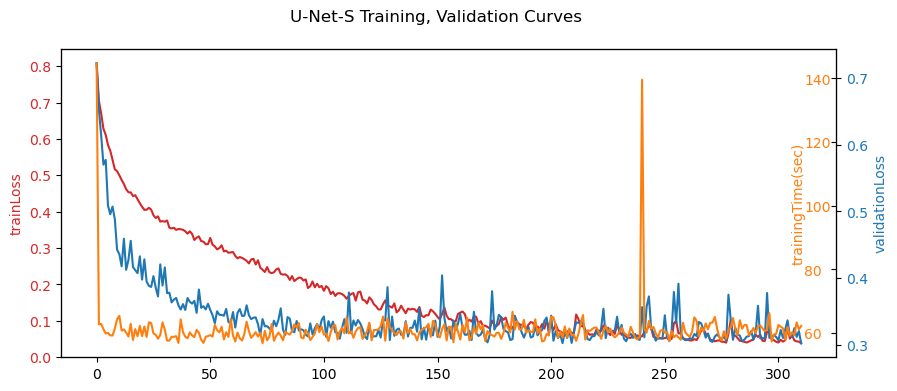

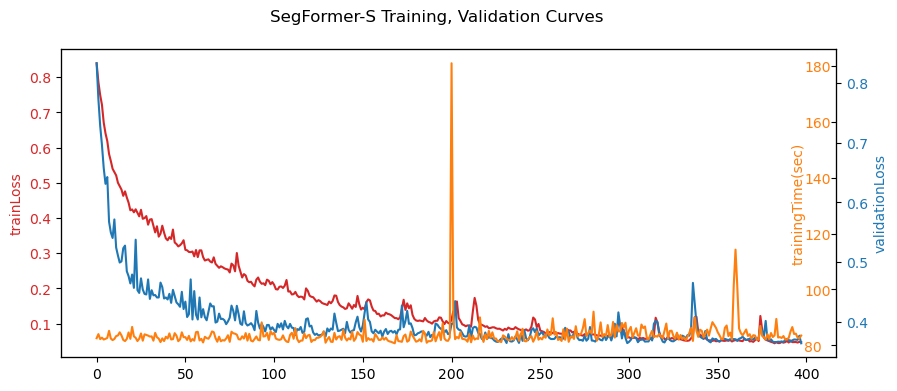

In [7]:
results_df1 = pd.DataFrame(checkpoint1['results'])
plot_training_results(results_df1, model1_label)

results_df2 = pd.DataFrame(checkpoint2['results'])
plot_training_results(results_df2, model2_label)

In [8]:
# get classes form dataset
try: 
    CLASSES = test_dataset.CLASSES
except:
    try:
        CLASSES = test_dataset.dataset.CLASSES
    except KeyError: 
        raise KeyError('dataset has no attribute CLASSES')    

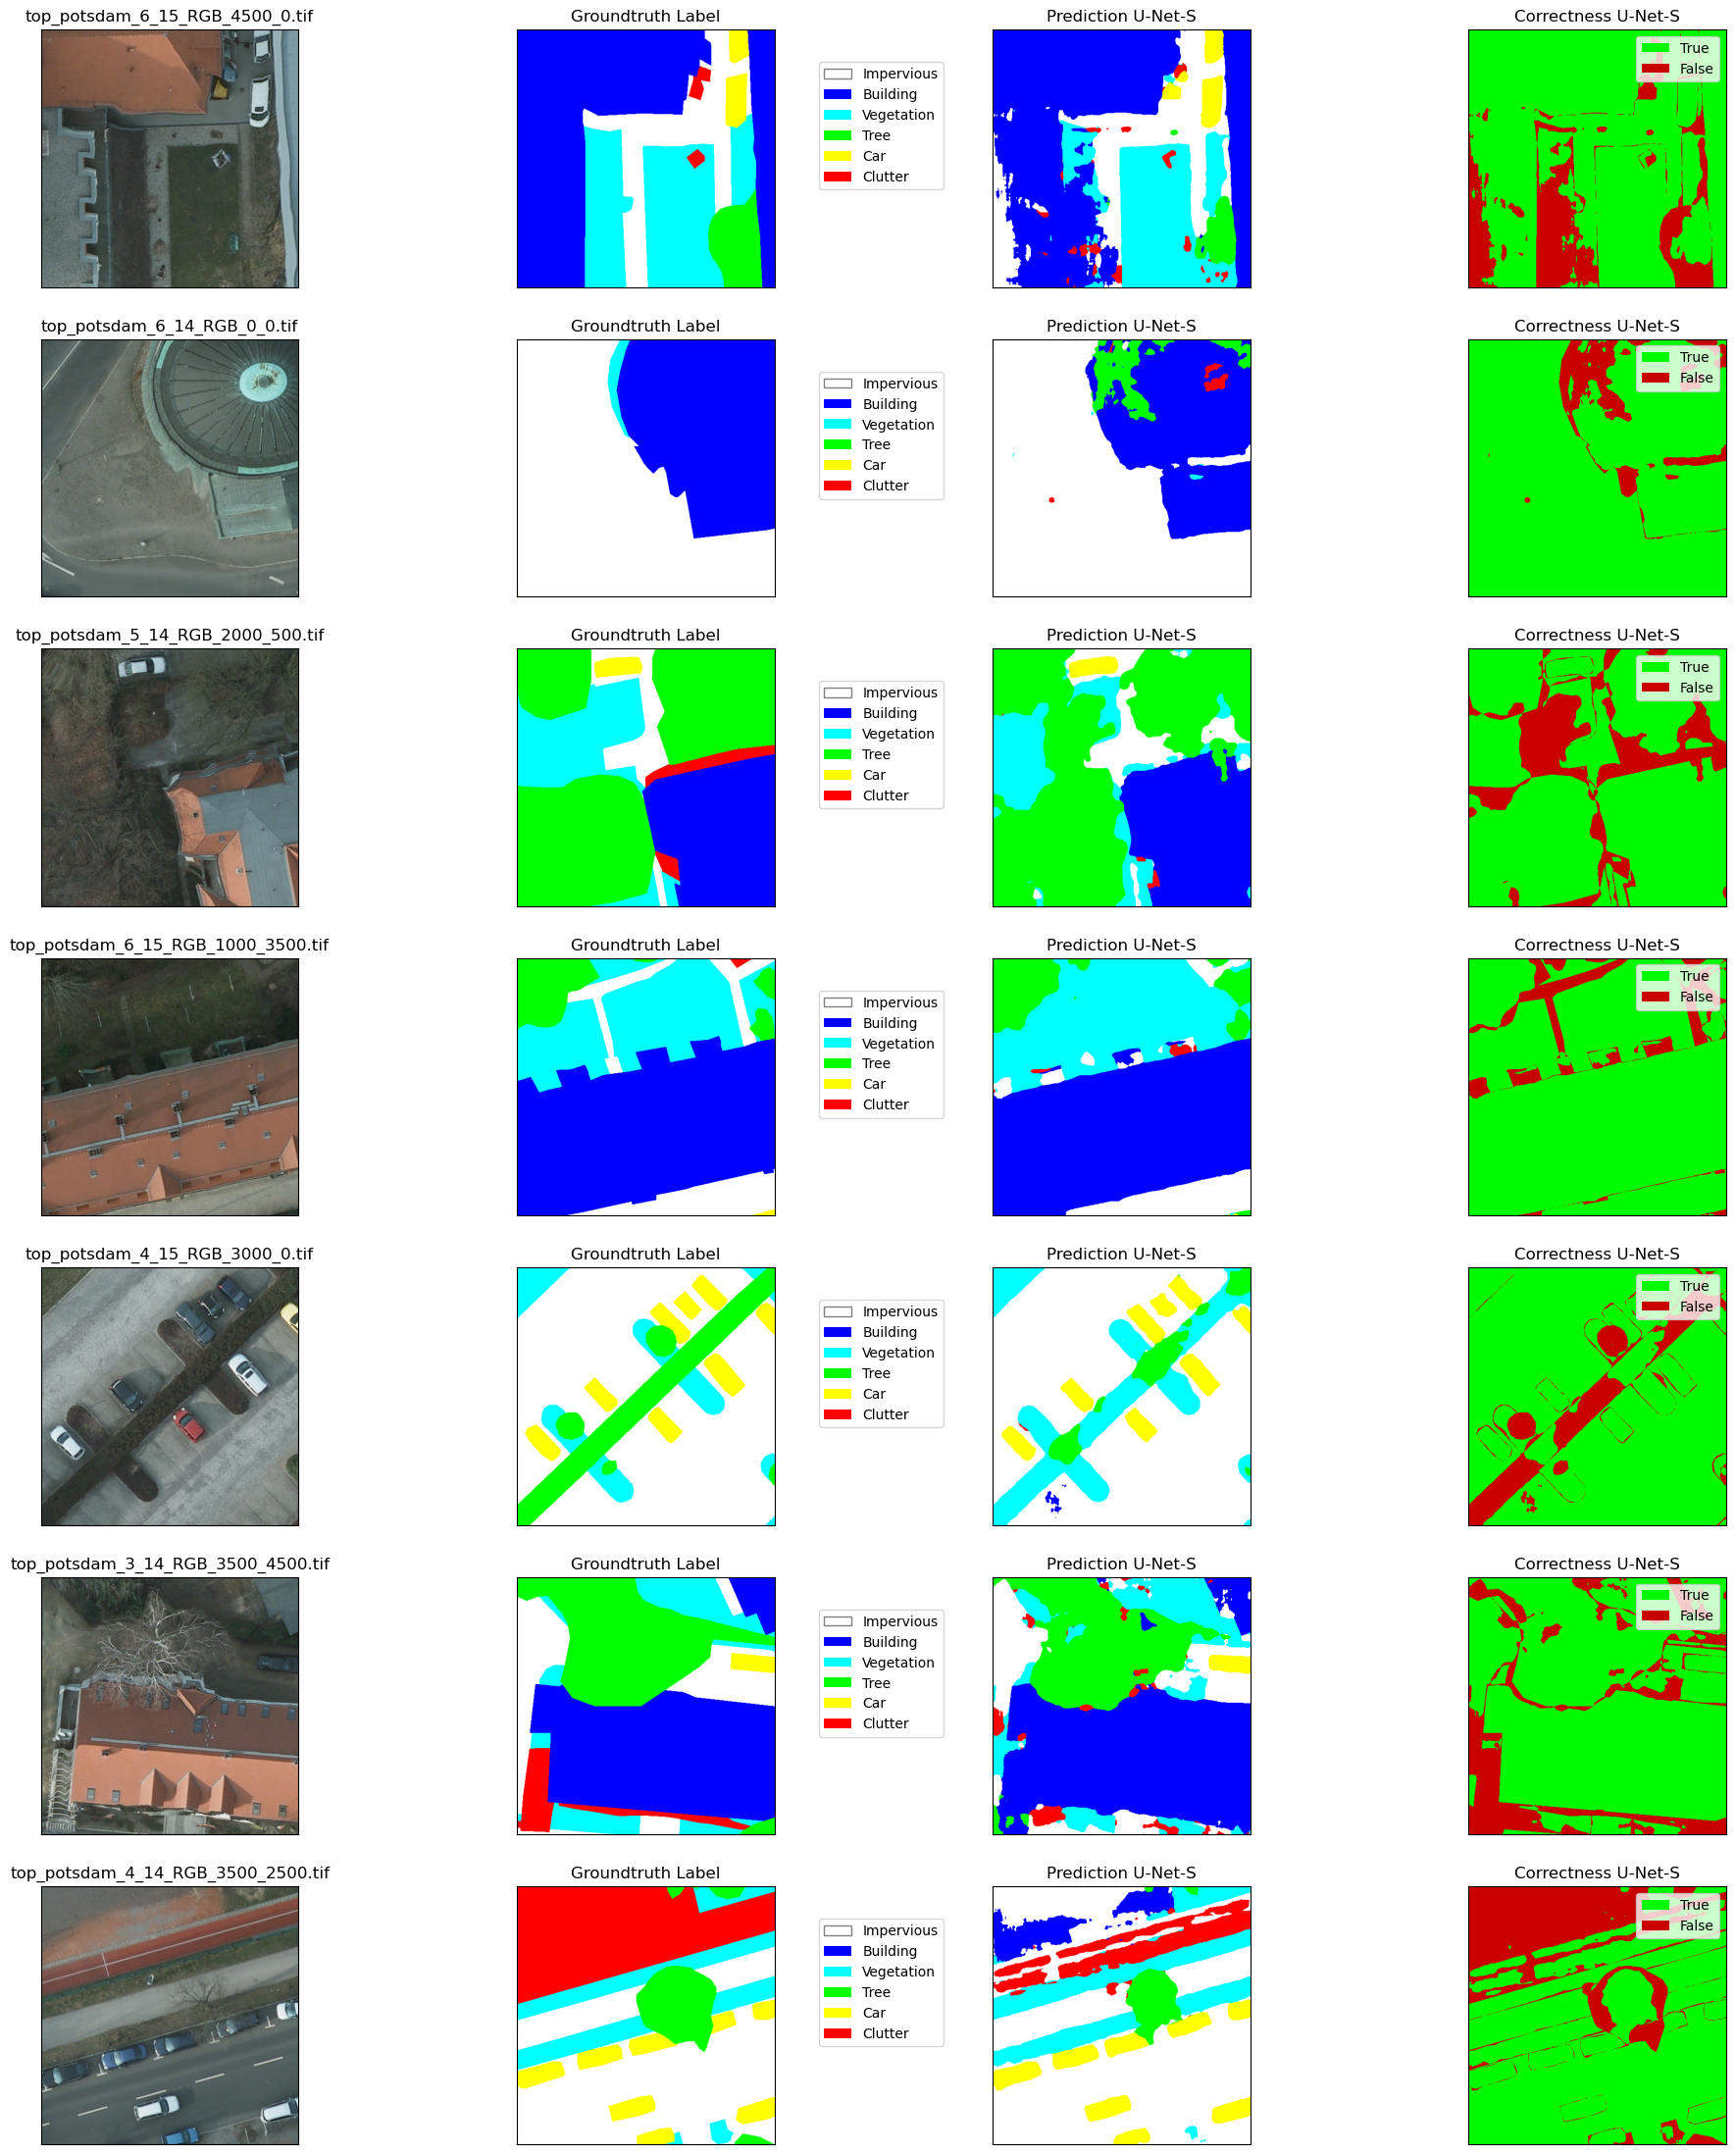

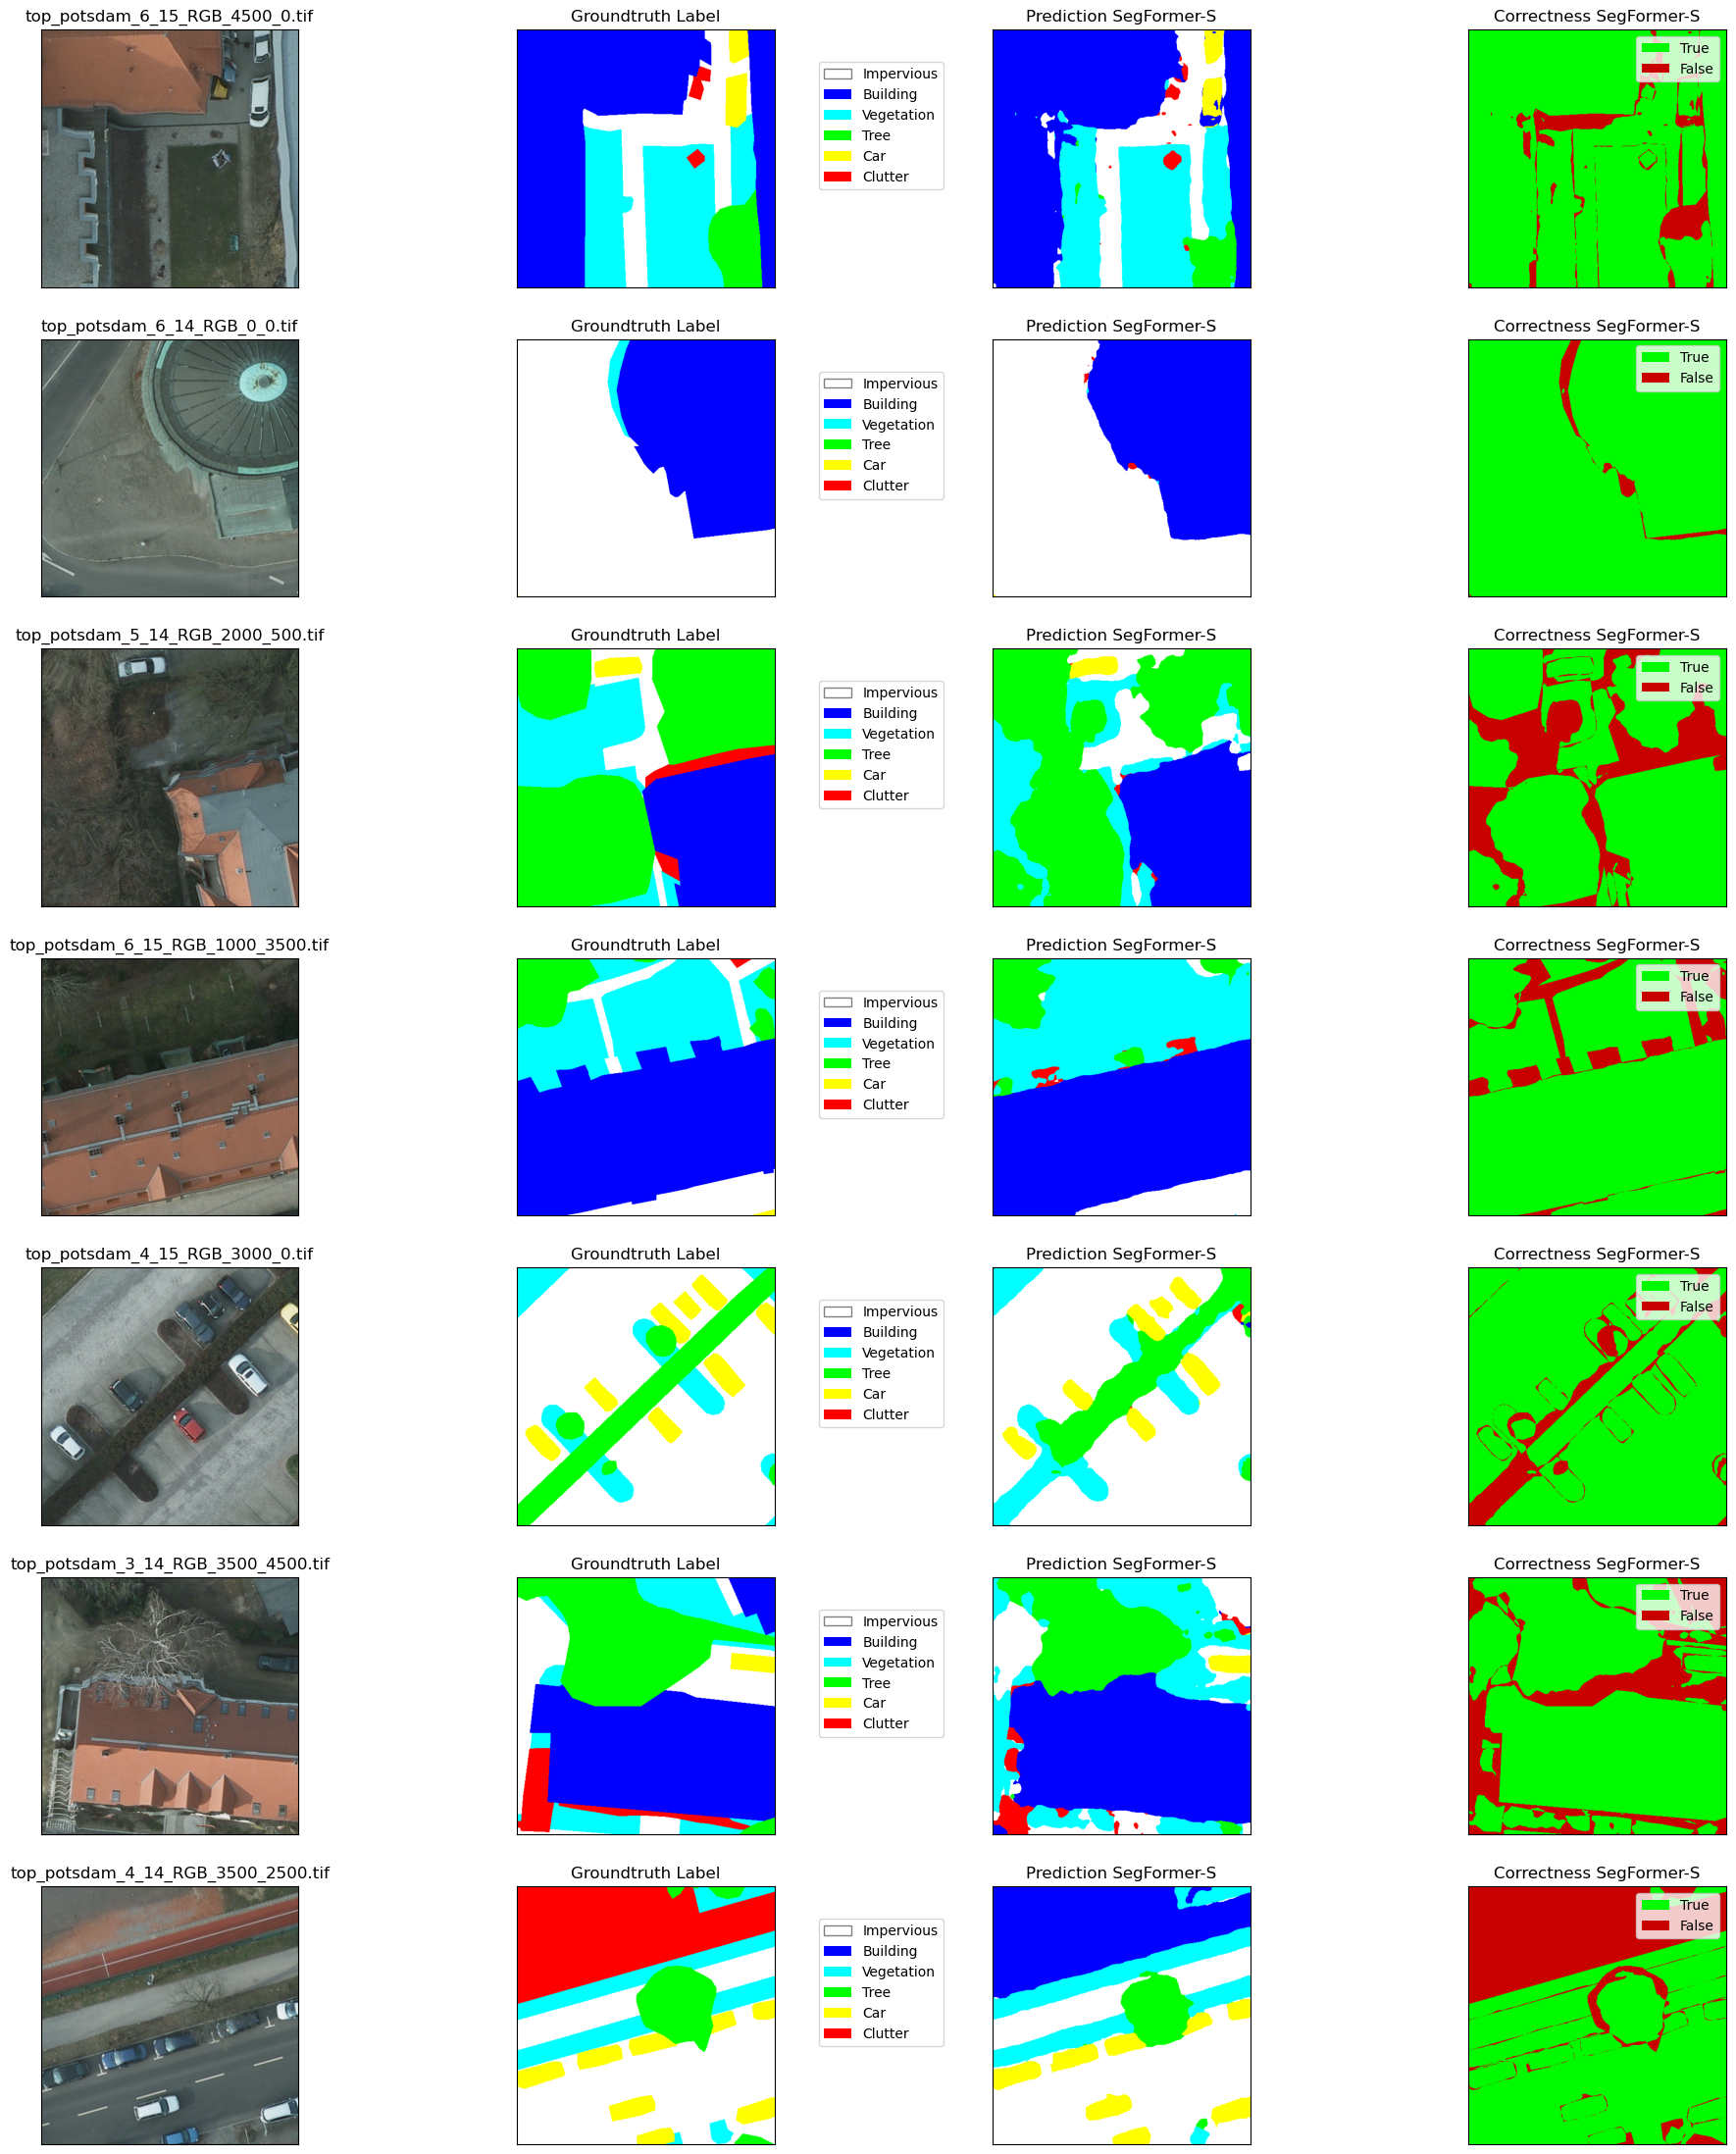

In [9]:
# plot test predictions
from utils import visualize_predictions#, train_id_to_color, drivables

  

num_test_samples = 7
seed = 2345

if len(CLASSES) == 10:
    CLASSES[1] = 'Building\nflooded'
    CLASSES[2] = 'Building\nnon-flooded'
    CLASSES[3] = 'Road\nflooded'
    CLASSES[4] = 'Road\nnon-flooded'

# model 1 plot
_, axes1 = plt.subplots(num_test_samples, 4, figsize=(4*6, num_test_samples * 4))
# _.suptitle(model1_label, fontsize=20)
visualize_predictions(model1, test_dataset, axes1, device, numTestSamples=num_test_samples, seed = seed, 
                      norm_dataset = norm_dataset, 
                      classes=CLASSES, model_label=model1_label)
# _.savefig('../results/'+model1_name+'_noSamples'+str(num_test_samples)+'_seed'+str(seed))
_.savefig('../results/'+model1_label+'_noSamples'+str(num_test_samples)+'_seed'+str(seed)
          # +'_vaihingen256'
         , bbox_inches='tight')

# model 2 plot
_, axes2 = plt.subplots(num_test_samples, 4, figsize=(4*6, num_test_samples * 4))
# _.suptitle(model2_label, fontsize=20)
visualize_predictions(model2, test_dataset, axes2, device, numTestSamples=num_test_samples, seed = seed, 
                      norm_dataset = norm_dataset, 
                      classes=CLASSES, model_label=model2_label)
# _.savefig('../results/'+model2_name+'_noSamples'+str(num_test_samples)+'_seed'+str(seed))
_.savefig('../results/'+model2_label+'_noSamples'+str(num_test_samples)+'_seed'+str(seed)
          # +'_vaihingen256'
         , bbox_inches='tight')

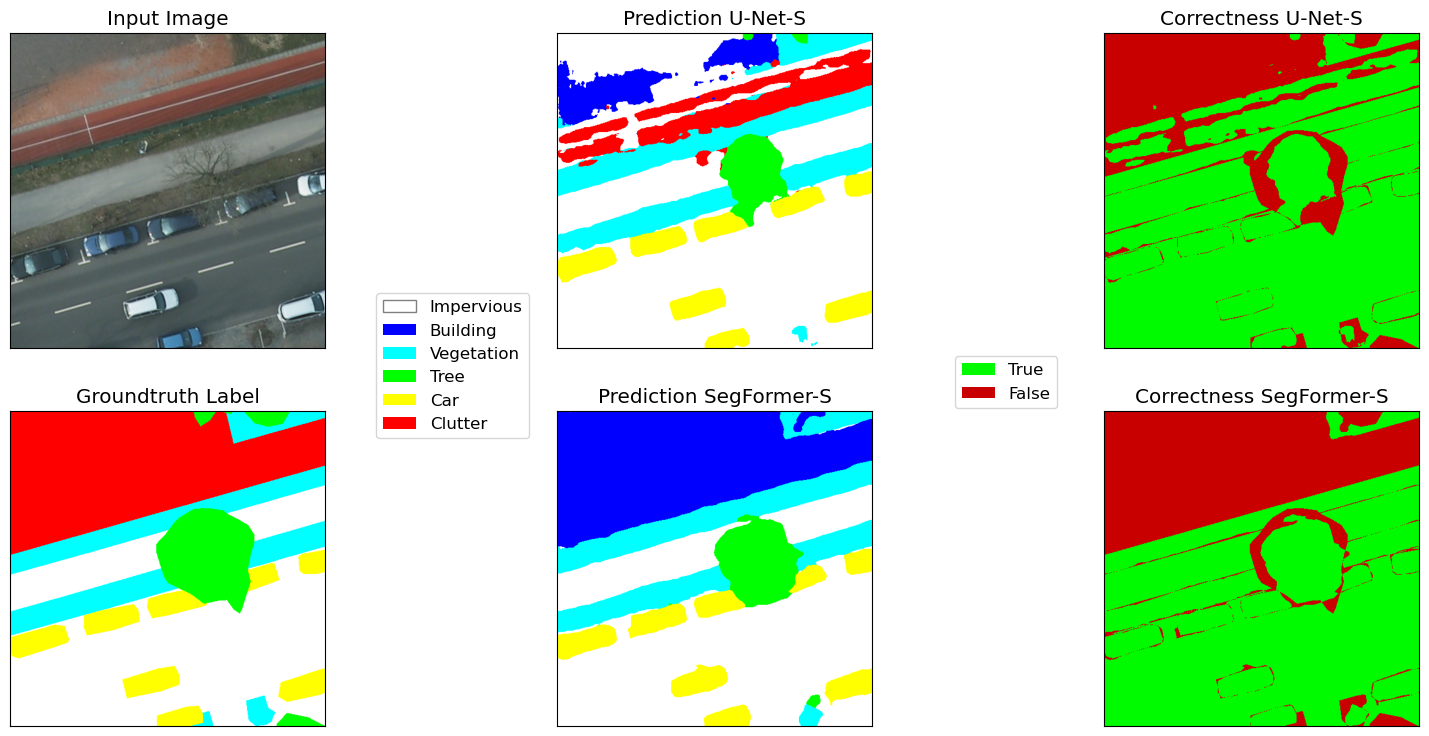

In [10]:
from utils import compare_models_onOneImage

if len(CLASSES) == 10:
    CLASSES[1] = 'Building\nflooded'
    CLASSES[2] = 'Building\nnon-flooded'
    CLASSES[3] = 'Road\nflooded'
    CLASSES[4] = 'Road\nnon-flooded'

title = model1_name + ' \n ' + model2_name
# image has to be in dataset
additional_information = ''
# additional_information = '256px-dataset'
image = 'top_potsdam_4_14_RGB_3500_2500.tif'
# image = 'top_potsdam_3_14_IRRG_5488_1500.tif'
# image = 'top_mosaic_09cm_area27_500_2000.tif'
# image = '7373_1000_2048.tif'
comparison_im = compare_models_onOneImage(model1 = model1, model2 = model2, model1_label = model1_label, model2_label = model2_label, plot_title = None, dataset = test_dataset, im_name = image, device = device, classes = CLASSES, norm_dataset = norm_dataset)
comparison_im.savefig('../results/comparison_'+label_add+'_'+image[:-4]+'_'+model1_name+'_'+model2_name+'_'+additional_information, bbox_inches='tight')
comparison_im.savefig('/cloud/sciebo/MasterThesis/master-thesis/figures/results/comparison_'+label_add+'_'+image[:-4]+'_'+model1_name+'_'+model2_name+'_'+additional_information, bbox_inches='tight')

# Metrics
Calculate qunatitative results and save as csv-files.

In [11]:
# loss function; actually irrelevant for metric calculation
criterion = smp.losses.JaccardLoss('multiclass', log_loss = False, smooth=0.0)
# evaluate model performance on test dataset
_, test_metric1 = evaluate_model(model1, test_loader, criterion, IoU, len(CLASSES), device)
# print(f"\nModel has {test_metric1} metrices in test set")
_, test_metric2 = evaluate_model(model2, test_loader, criterion, IoU, len(CLASSES), device)
# print(f"\nModel has {test_metric1} metrices in test set")

NameError: name 'evaluate_models' is not defined

In [ ]:
# TODO: put into utils

# calculate recall, precision , f1 from confusion matrix
def create_resultstable(metrices, classes):
    # get matrix from results
    # results = results_df.metrices[len(results_df)-1] 
    results = metrices
    matrix = results['matrix']
    # calculate recall and respective values for wrong segmentations
    matrix_per = matrix / matrix.sum(axis = 1)[np.newaxis].T # transpose sum to apply divison to rows
    recall = np.diag(matrix_per)
    # other metrices
    precision = np.diag(matrix / matrix.sum(axis = 0))
    f1 = 2*precision*recall / (precision+recall)
    
    # classes as captions for table
    CLASSES = classes
    
    # make df and add column names and ids
    df = pd.DataFrame(matrix_per)
    df.columns = [s + '_pred' for s in CLASSES]
    df.index = [s + '_tr' for s in CLASSES]
    # add metrices
    df.loc['Precision'] = precision
    df.loc['Recall'] = recall
    df.loc['f1'] = f1
    df.loc['IoU'] = results['classwise_iou']
    df.loc['(overall next)'] = '-'
    df.loc['Accuracy'] = results['accuracy']
    df.loc['mIoU'] = results['miou']
    
    # print('Metrices')
    print(f'Accuracy: {results["accuracy"]}, MeanIoU: {results["miou"]}') 
          #, f1 score mean: {results["f1_mean"]}')
    print('"row predicted as column"')
    display(df)
    return df

In [ ]:
# metrices on test data

print(f'{model1_label} ({len(results_df1)} epochs)')
testresults_model1 = create_resultstable(test_metric1, CLASSES)
# testresults_model1.to_csv('../results/'+model1_label+'_testresults_'+model1_name+'.csv')
# pd.DataFrame(test_metric1['matrix']).to_csv(('../results/raw_'+model1_label+'_testresults_'+model1_name+'.csv'))
testresults_model1.to_csv('../results/'+model1_name+'testresults_vaihingen512.csv')
print(f'{model2_label} ({len(results_df2)} epochs)')
testresults_model2 = create_resultstable(test_metric2, CLASSES)
# testresults_model2.to_csv('../results/'+model2_label+'_testresults_'+model2_name+'.csv')
# pd.DataFrame(test_metric2['matrix']).to_csv(('../results/raw_'+model2_label+'_testresults_'+model2_name+'.csv'))
testresults_model2.to_csv('../results/'+model2_name+'testresults_vaihingen512.csv')

In [ ]:
# metrices on validation data

print(f'{model1_label} ({len(results_df1)} epochs), validation data')
valresults_model1 = create_resultstable(checkpoint1['results'][-1]['metrices'], CLASSES)
valresults_model1.to_csv('../results/'+model1_label+'_validationresults_'+model1_name+'.csv')
print(f'{model2_label} ({len(results_df2)} epochs), validation data')
valresults_model2 = create_resultstable(checkpoint2['results'][-1]['metrices'], CLASSES)
valresults_model2.to_csv('../results/'+model2_label+'_validationresults_'+model2_name+'.csv')